In [22]:
#Loan Status prediction using Logistic regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
orgdata=pd.read_csv("01Exercise1.csv")

In [5]:
dataloan=orgdata.copy()

In [9]:
dataloan.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [11]:
dataloan.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [15]:
dataloan=dataloan.dropna()

In [16]:

dataloan.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [17]:
dataloan=dataloan.drop(['gender'],axis=1)

In [43]:
dataloan=pd.get_dummies(dataloan,drop_first=True)

In [44]:
dataloan.columns

Index(['ch', 'income', 'loanamt', 'married_Yes', 'status_Y'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x25851117160>,
 'caps': [<matplotlib.lines.Line2D at 0x25851142610>,
 'boxes': [<matplotlib.lines.Line2D at 0x25851470b50>],
 'medians': [<matplotlib.lines.Line2D at 0x25851169e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x25851169670>],
 'means': []}

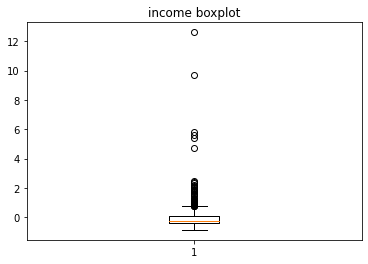

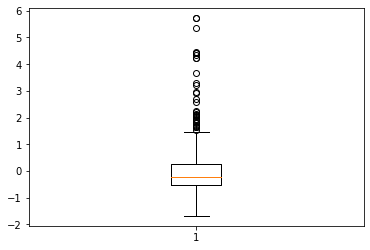

In [45]:
plt.figure()
plt.title("income boxplot")
plt.boxplot(dataloan['income'])

plt.figure("Loan amount box plot")
plt.boxplot(dataloan['loanamt'])

In [46]:
scalarloan=StandardScaler()

In [47]:
dataloan['income']=scalar.fit_transform(dataloan[['income']])


In [48]:
dataloan['loanamt']=scalar.fit_transform(dataloan[['loanamt']])

In [49]:
dataloan.columns

Index(['ch', 'income', 'loanamt', 'married_Yes', 'status_Y'], dtype='object')

In [53]:
y=dataloan[['status_Y']]

In [55]:
x=dataloan.drop(['status_Y'],axis=1)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.7,random_state=123)

In [57]:
lgrloan=LogisticRegression()

In [58]:
lgrloan.fit(x_train,y_train)

C:\Users\BaijnathKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [59]:
y_pre=lgrloan.predict(x_test)

In [60]:
scorelgr=lgrloan.score(x_test,y_test)

In [62]:
cm=confusion_matrix(y_test,y_pre)

In [63]:
cm

array([[ 48,  66],
       [  9, 248]], dtype=int64)

In [64]:
scorelgr

0.7978436657681941